# Predicting Education Project Funding Status
 
**Assignment 3: Application of ML Pipeline**
    
Aya Liu  
04/28/2019

Pipeline
---
   - Data preparation  
   - Exploratory analysis  
   - Pre-processing  
   - Feature generation  
   - Model building  
   - Validation  
 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pipeline as pp

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### I. Data Preparation

In [2]:
# Read data
file = 'data/projects_2012_2013.csv'
coltypes = {'school_ncesid': str}
parse_dates = ['date_posted', 'datefullyfunded']
df = pp.read_data(file, coltypes=coltypes, parse_dates=parse_dates)

In [3]:
# Calculate the number of days it takes for a project to get fully funded
df['time_till_funded'] = (df.datefullyfunded - df.date_posted).apply(lambda x: x.days)

# Create target variable to identify projects fully funded within 60 days of their posting dates
df['not_funded_wi_60d'] = np.where(df.time_till_funded <= 60, 1, 0)

In [4]:
df.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                     object
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

### II. Exploratory Analysis

Distribution of all numerical variables


,total_price_including_optional_support,students_reached
count,124976.000000,124917.000000
mean,654.011811,95.445760
std,1098.015854,163.481912
min,92.000000,1.000000
25%,345.810000,23.000000
50%,510.500000,30.000000
75%,752.960000,100.000000
max,164382.840000,12143.000000



########
Variable: total_price_including_optional_support
---
Distribution of total_price_including_optional_support grouped by not_funded_wi_60d


,count,mean,std,min,25%,50%,75%,max
not_funded_wi_60d,,,,,,,,
0,36010.0,801.572199,1217.907204,122.61,452.05,589.790,899.9225,69670.89
1,88966.0,594.285067,1039.657542,92.00,306.71,475.475,671.9900,164382.84


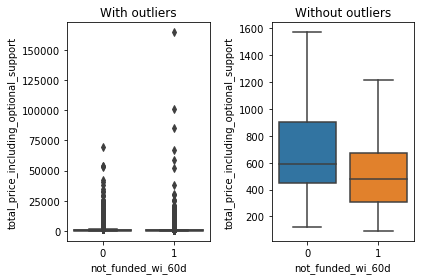

Upper outliers: % obs having total_price_including_optional_support > 1571.73125
	not_funded_wi_60d = 0: 0.06

	not_funded_wi_60d = 1: 0.03

Lower outliers: % obs having total_price_including_optional_support < -241.2100000000001
	not_funded_wi_60d = 0:: 0.00

	not_funded_wi_60d = 1:: 0.00


########
Variable: students_reached
---
Distribution of students_reached grouped by not_funded_wi_60d


,count,mean,std,min,25%,50%,75%,max
not_funded_wi_60d,,,,,,,,
0,35990.0,98.604640,160.891321,1.0,23.0,31.0,100.0,999.0
1,88927.0,94.167317,164.502419,1.0,23.0,30.0,100.0,12143.0


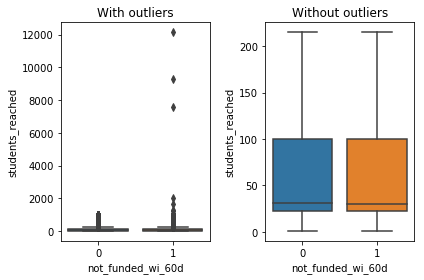

Upper outliers: % obs having students_reached > 215.5
	not_funded_wi_60d = 0: 0.10

	not_funded_wi_60d = 1: 0.09

Lower outliers: % obs having students_reached < -92.5
	not_funded_wi_60d = 0:: 0.00

	not_funded_wi_60d = 1:: 0.00


########
Number of observations by school_metro


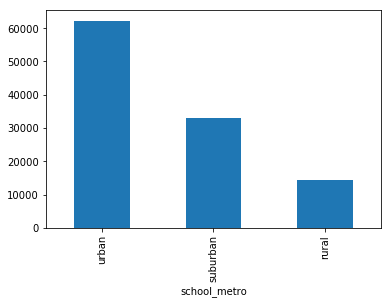

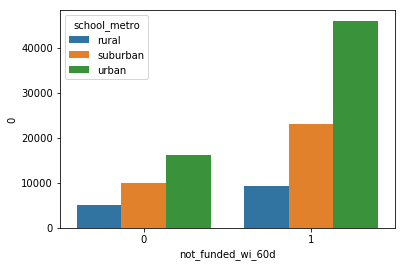


########
Number of observations by school_charter


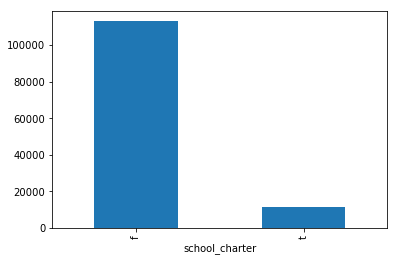

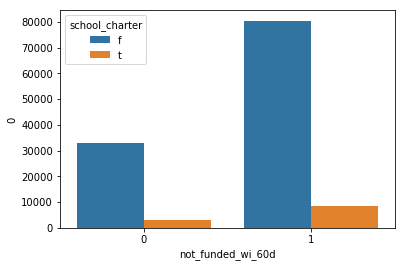


########
Number of observations by school_magnet


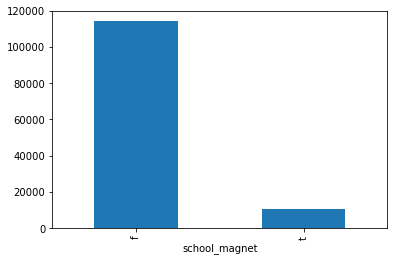

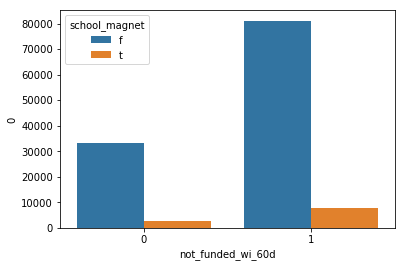


########
Number of observations by primary_focus_area


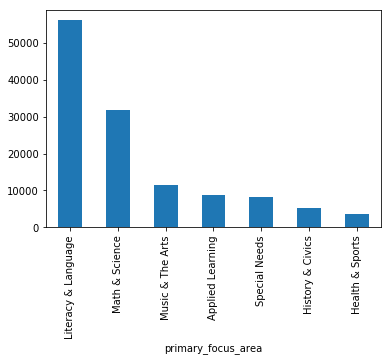

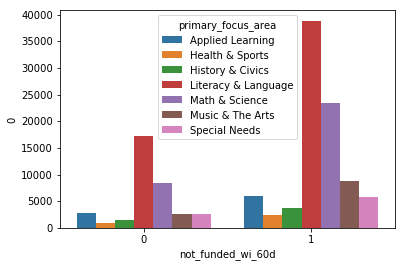


########
Number of observations by secondary_focus_area


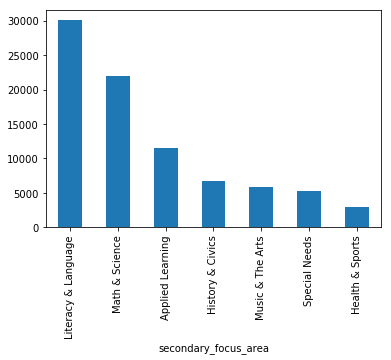

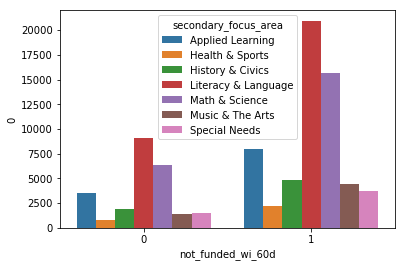


########
Number of observations by resource_type


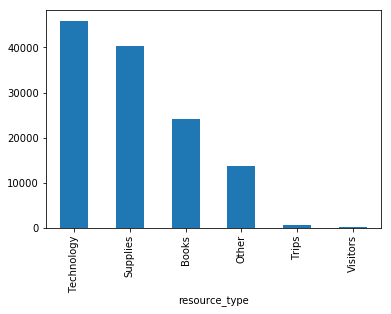

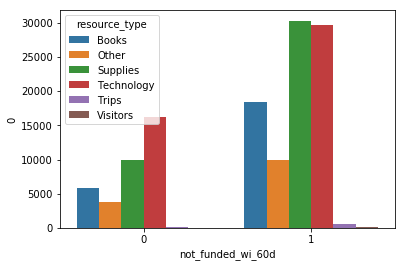


########
Number of observations by poverty_level


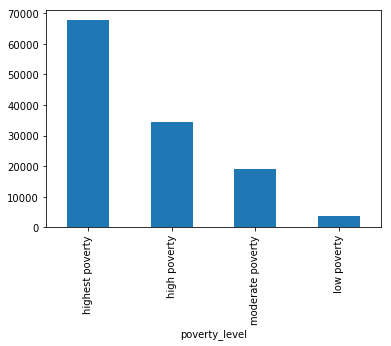

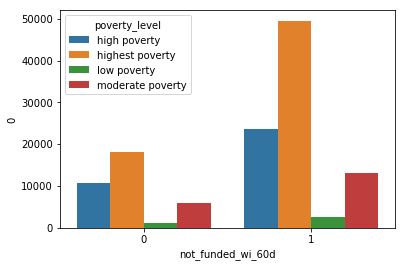


########
Number of observations by grade_level


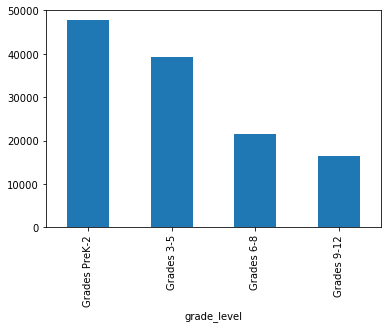

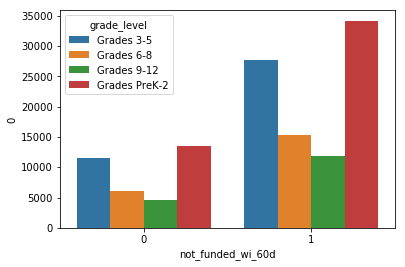


########
Number of observations by eligible_double_your_impact_match


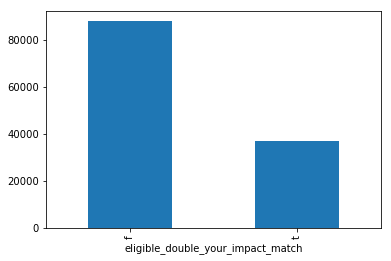

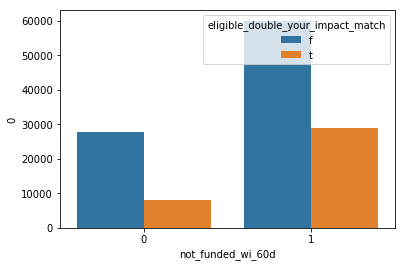

########
Number and percentage of missing data in each column:



,num_NA,perc_NA
school_ncesid,9233,0.073878
school_metro,15224,0.121815
school_district,172,0.001376
primary_focus_subject,15,0.000120
primary_focus_area,15,0.000120
secondary_focus_subject,40556,0.324510
secondary_focus_area,40556,0.324510
resource_type,17,0.000136
grade_level,3,0.000024
students_reached,59,0.000472


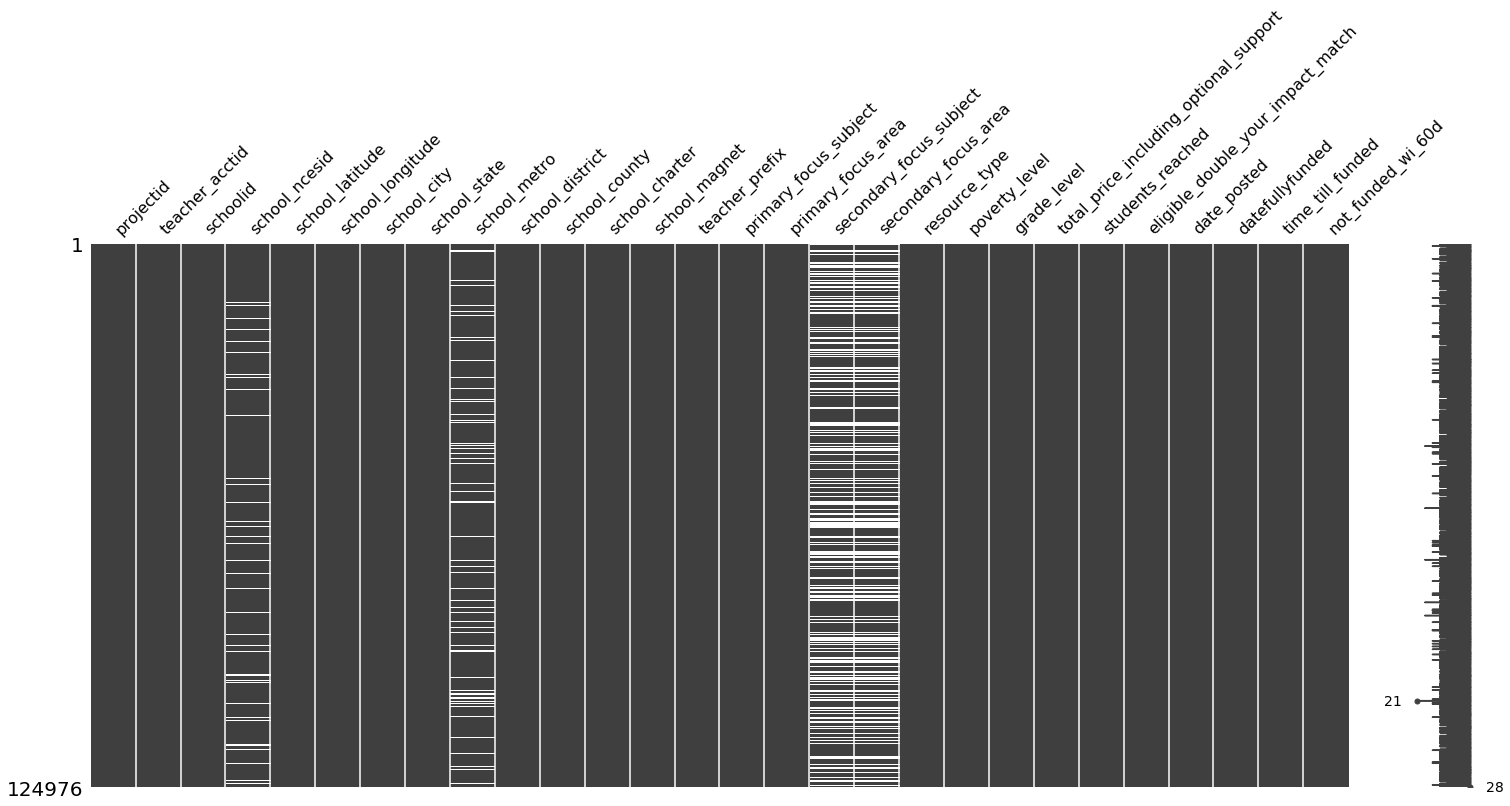

In [5]:
# Set target variable to constant
T = 'not_funded_wi_60d'

# Construct lists of variables to explore
num_vars = ['total_price_including_optional_support', 'students_reached']
cat_vars = ['school_metro', 'school_charter', 'school_magnet', 'primary_focus_area', 'secondary_focus_area', 
            'resource_type', 'poverty_level', 'grade_level', 'eligible_double_your_impact_match']

# Explore selected variables
pp.explore_data(T, num_vars, cat_vars, df)

### III. Pre-processing


In [6]:
# drop NA rows for selected columns where NA rows do not makeup a significant portion of the data
cols_to_drop = ['school_district', 
                'primary_focus_subject', 
                'primary_focus_area', 
                'resource_type', 
                'grade_level', 
                'students_reached']
df.dropna(axis=0, subset=cols_to_drop, inplace=True)

### IV. Feature Generation

Variable to discretize: total price including optional support

In [7]:
# Discretize total_price_including_optional_support

bins_tp = [0, 300, 600, 900, 1200, float('inf')]
labels_tp = ['<300', '300-600', '600-900', '900-1200', '>1200']
df['total_price_cat'] = pp.discretize(varname='total_price_including_optional_support', data=df, 
                                      bins=bins_tp, labels=labels_tp)

In [8]:
# Convert selected variables to dummies

cols_to_transform = ['school_charter', 'school_magnet', 'primary_focus_area', 
                     'resource_type', 'secondary_focus_area', 'resource_type', 
                     'poverty_level', 'grade_level', 'eligible_double_your_impact_match', 
                     'total_price_cat']
dfbin = pp.convert_to_dummy(df, cols_to_transform, dummy_na=True)
dfbin.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,teacher_prefix,primary_focus_subject,secondary_focus_subject,total_price_including_optional_support,students_reached,date_posted,datefullyfunded,time_till_funded,not_funded_wi_60d,school_charter_f,school_charter_t,school_charter_nan,school_magnet_f,school_magnet_t,school_magnet_nan,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_area_nan,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,secondary_focus_area_nan,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,poverty_level_nan,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,grade_level_nan,eligible_double_your_impact_match_f,eligible_double_your_impact_match_t,eligible_double_your_impact_match_nan,total_price_cat_<300,total_price_cat_300-600,total_price_cat_600-900,total_price_cat_900-1200,total_price_cat_>1200,total_price_cat_nan
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.70993E+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,Mrs.,Mathematics,Visual Arts,1498.61,31.0,2013-04-14,2013-05-02,18,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,64098006751,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,Mrs.,Civics & Government,Literature & Writing,282.47,28.0,2012-04-07,2012-04-18,11,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,62271003143,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,Ms.,Literacy,Social Sciences,1012.38,56.0,2012-01-30,2012-04-15,76,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.60009E+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),Ms.,Literacy,NaN,175.33,23.0,2012-10-11,2012-12-05,55,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.60687E+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,Mrs.,Literacy,Literature & Writing,3591.11,150.0,2013-01-08,2013-03-25,76,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


### V. Model Buidling

- Which classifier does better on which metrics? 
- How do the results change over time? 
- What would be your recommendation to someone who's working on this model to identify 5% of posted projects to intervene with, which model should they decide to go forward with and deploy?

The report should not be a list of graphs and numbers. It needs to explain to a policy audience the implications of your analysis and your recommendations as a memo you would send to a policy audience.

In [9]:
# select a vector of features 
feat_cols = pp.get_feature_cols(T, dfbin)

In [10]:
# Train-test split (based on 3 6-month blocks)
sets = pp.temporal_train_test_split(T, feat_cols, dfbin, date_col='date_posted', n_splits=3, show_sets=True)

Set 0
Train: Start 2012-01-01 00:00:00 | End 2012-08-13 00:00:00
Test: Start 2012-08-13 00:00:00 | End 2013-01-26 00:00:00
---
Set 1
Train: Start 2012-01-01 00:00:00 | End 2013-01-26 00:00:00
Test: Start 2013-01-26 00:00:00 | End 2013-09-03 00:00:00
---
Set 2
Train: Start 2012-01-01 00:00:00 | End 2013-09-03 00:00:00
Test: Start 2013-09-03 00:00:00 | End 2013-12-31 00:00:00
---


In [11]:
# Build models using classifiers and parameters set in pp.MODELS_TO_BUILD
models = pp.build_temporal_classifiers(pp.MODELS_TO_BUILD, sets, feat_cols)

Train: Start 2012-01-01 00:00:00 | End 2012-08-13 00:00:00
Test: Start 2012-08-13 00:00:00 | End 2013-01-26 00:00:00
--------------------------------
######DecTree######

Building DecTree: {'max_depth': 10}...
Built


Building DecTree: {'max_depth': 25}...
Built


Building DecTree: {'max_depth': 50}...
Built

######KNN######

Building KNN: {'n_neighbors': 10, 'weights': 'uniform'}...
Built


Building KNN: {'n_neighbors': 10, 'weights': 'distance'}...
Built


Building KNN: {'n_neighbors': 20, 'weights': 'uniform'}...
Built


Building KNN: {'n_neighbors': 20, 'weights': 'distance'}...
Built

######LogReg######

Building LogReg: {'penalty': 'l1'}...
Built


Building LogReg: {'penalty': 'l2'}...
Built

######RanFor######

Building RanFor: {'n_estimators': 50}...
Built


Building RanFor: {'n_estimators': 100}...
Built


Building RanFor: {'n_estimators': 200}...
Built

######Boosting######

Building Boosting: {'n_estimators': 50}...
Built


Building Boosting: {'n_estimators': 100}...
Built



### VI. Model Evaluation

In [12]:
# For all models built:
# 1) Calculate accuracy, precision, and recall at each %population 
# 2) Calculate ROC curve and AUC score
pop_perc = [x/10 for x in range(1, 11, 1)]
metrics = [accuracy_score, precision_score, recall_score]
models_w_metrics = pp.evaluate_models(models, metrics, pop_perc, roc=True)

In [13]:
# organize models by temporal set then by type
by_set_by_type = pp.organize_models_by_set_by_type(models_w_metrics, n_sets=3)

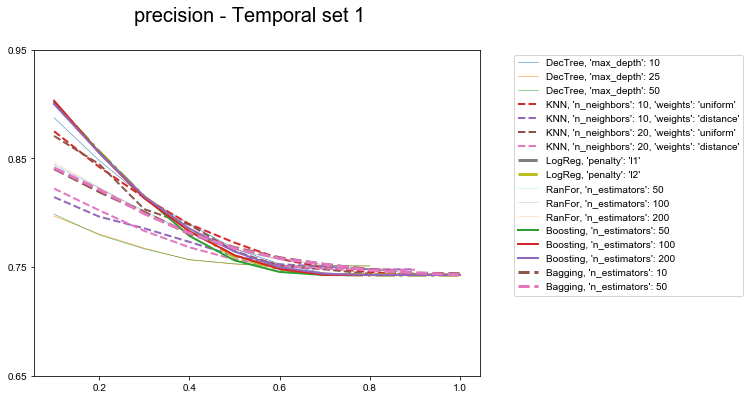

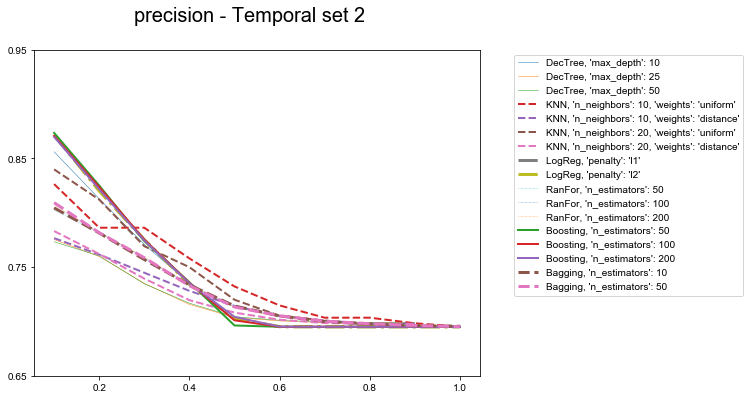

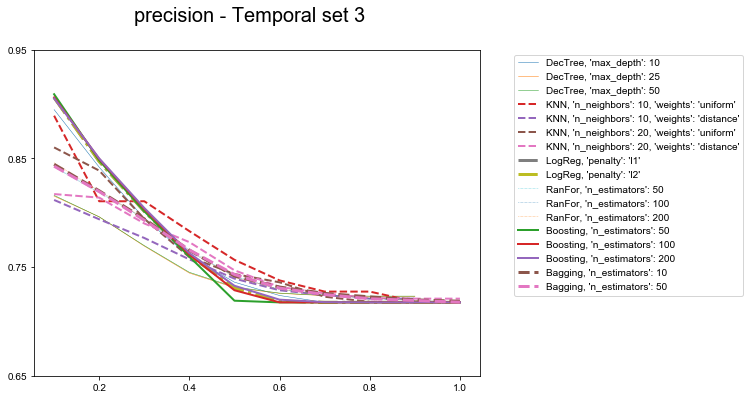

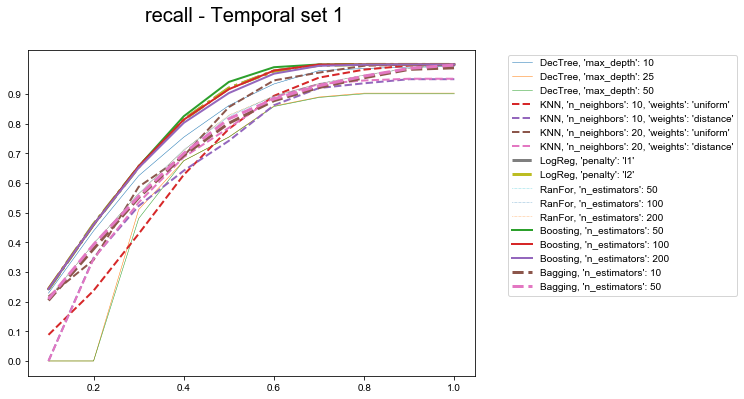

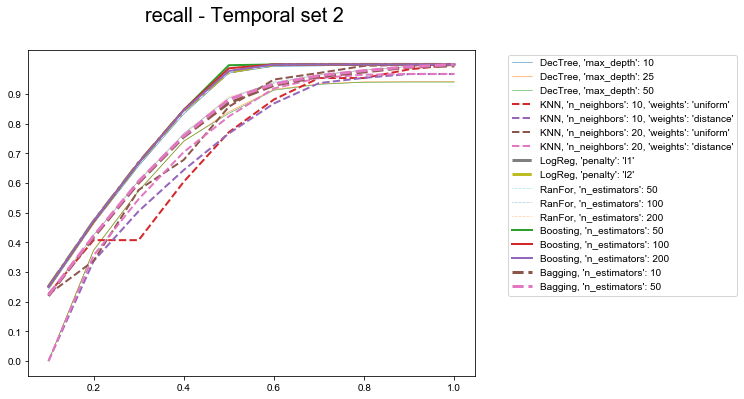

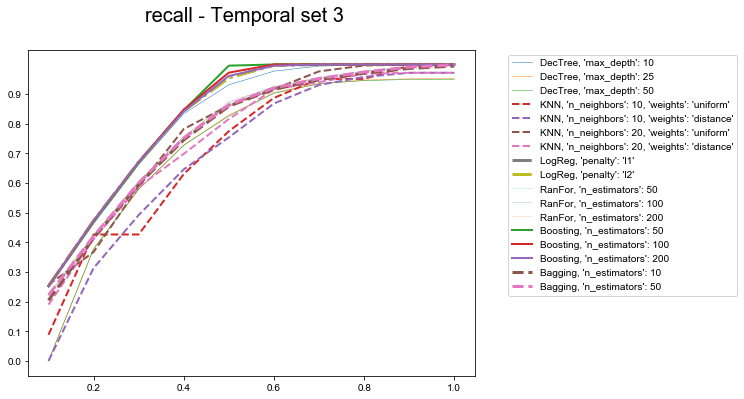

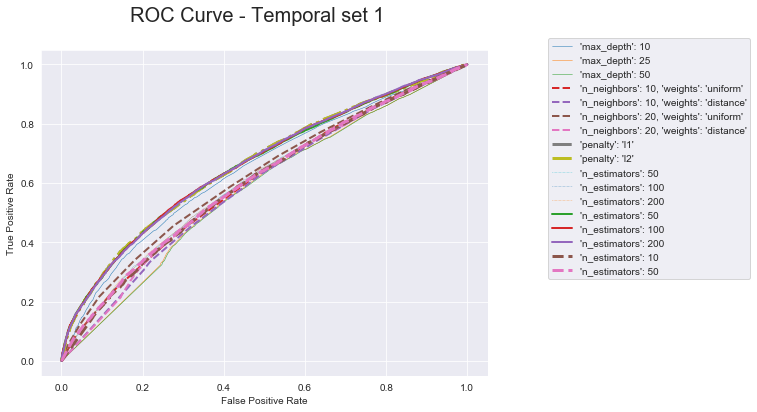

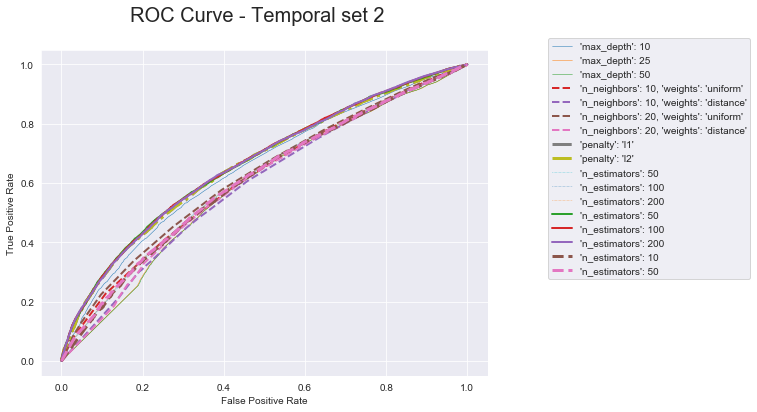

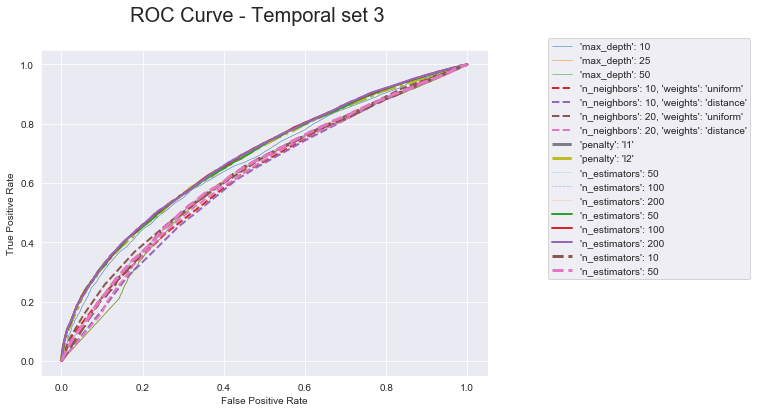

In [14]:
# compare precision between different classifiers across time
pp.compare_metrics_across_types(by_set_by_type, 
                                "precision", 
                                y_range=np.arange(0.65, 1, 0.1),
                                figsize=(8,6))
pp.compare_metrics_across_types(by_set_by_type, 
                                "recall", 
                                y_range=np.arange(0, 1, 0.1),
                                figsize=(8,6))
pp.compare_roc_curves_across_types(by_set_by_type)

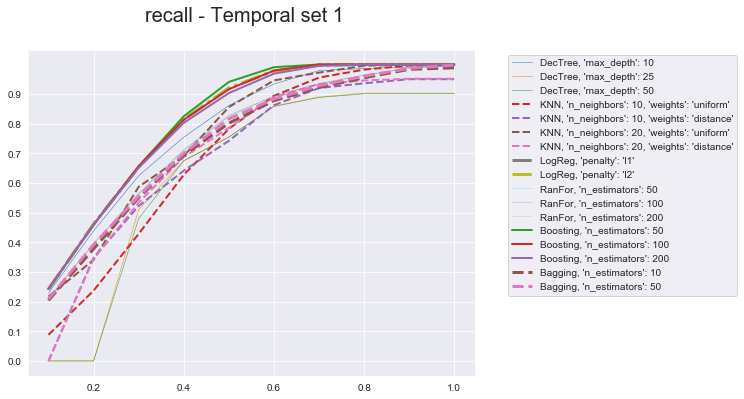

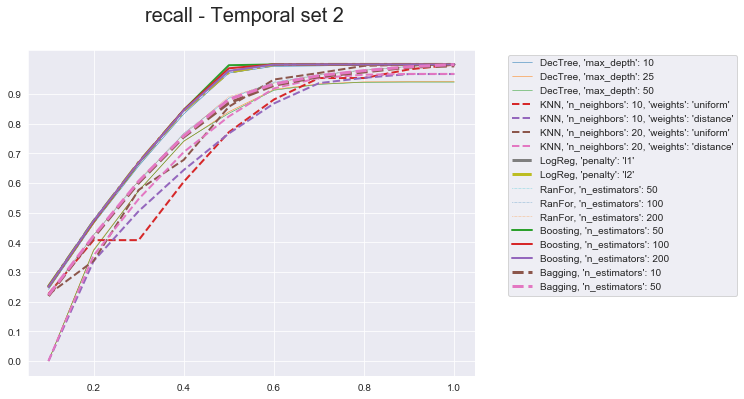

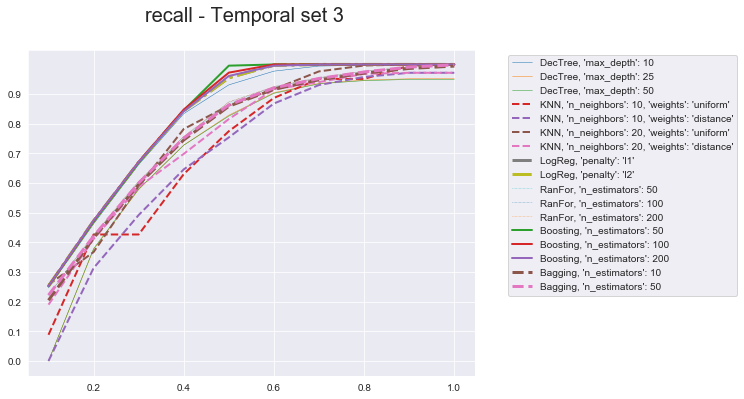

In [15]:
# compare recall between different classifiers across time
pp.compare_metrics_across_types(by_set_by_type, 
                                "recall", 
                                y_range=np.arange(0, 1, 0.1),
                                figsize=(8,6))

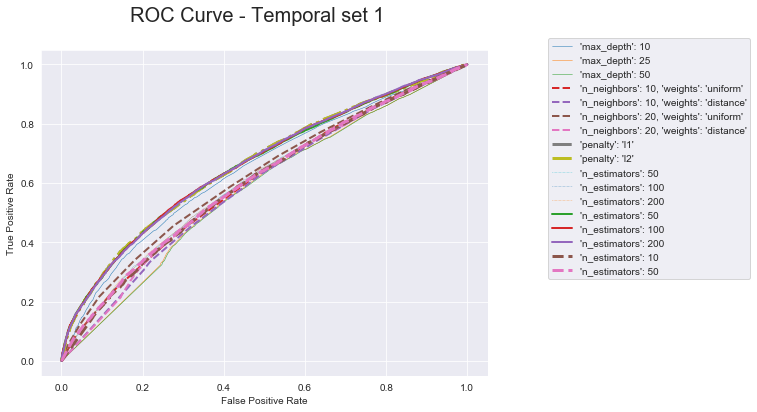

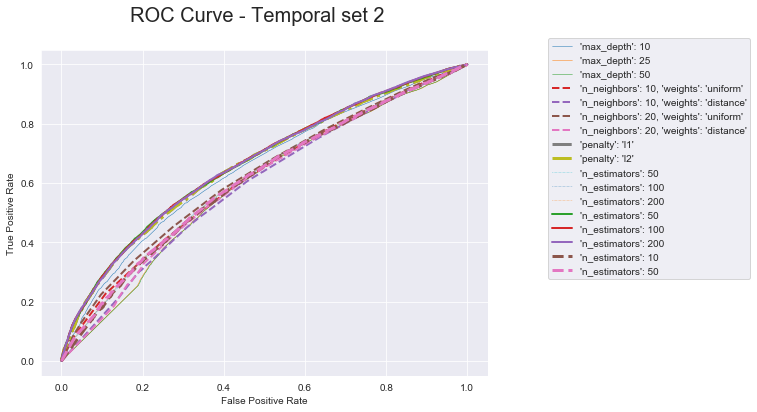

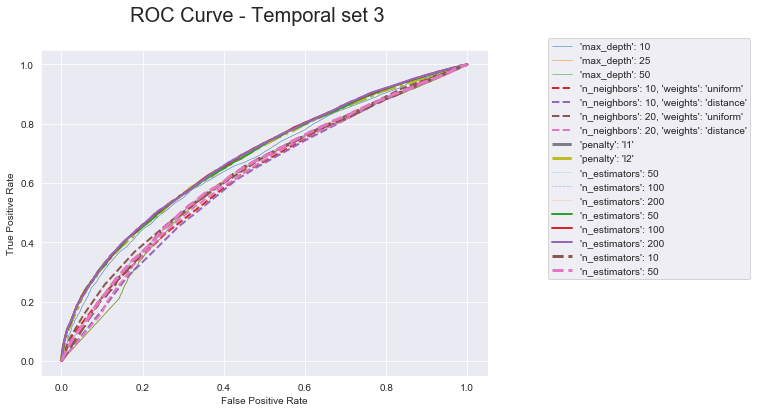

In [16]:
# compare precision between different classifiers across time
pp.compare_roc_curves_across_types(by_set_by_type)

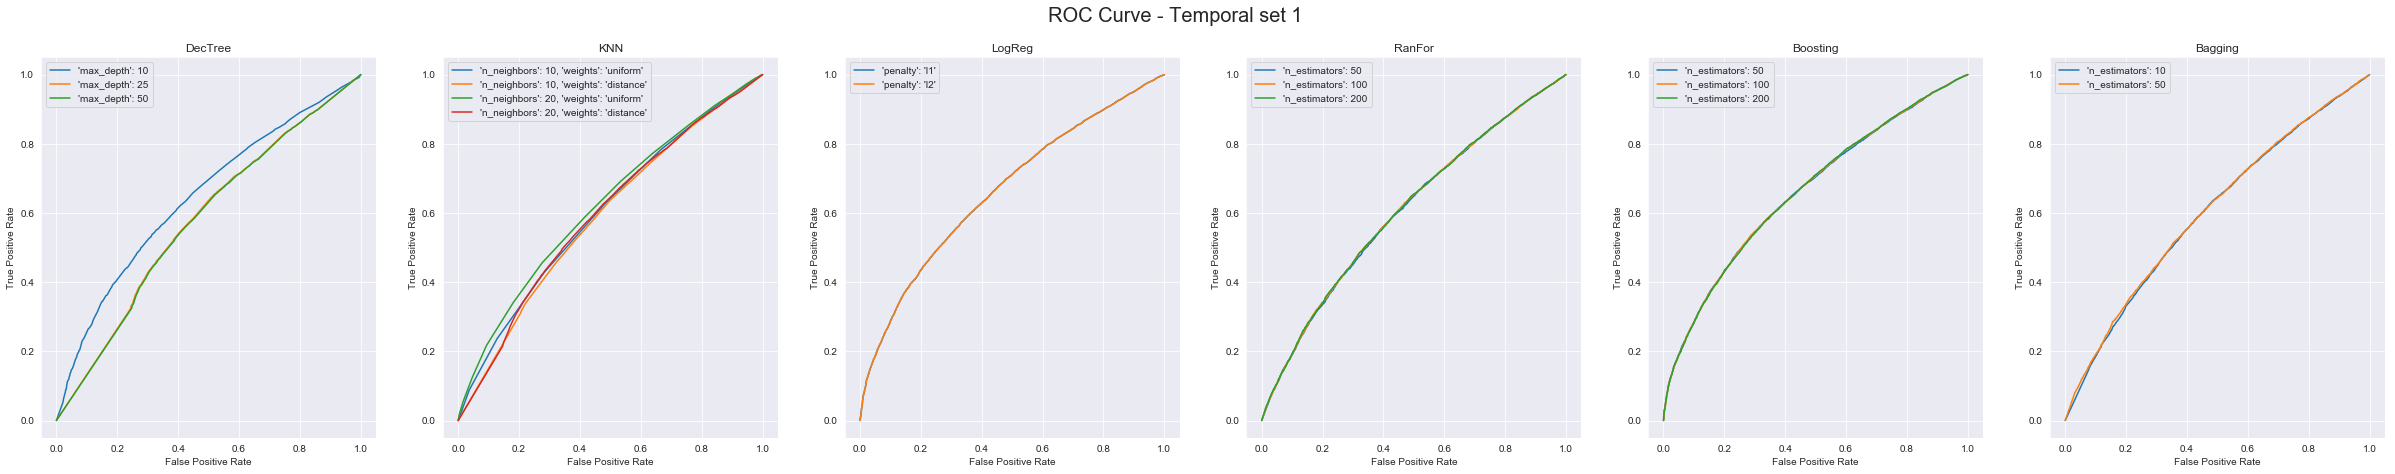

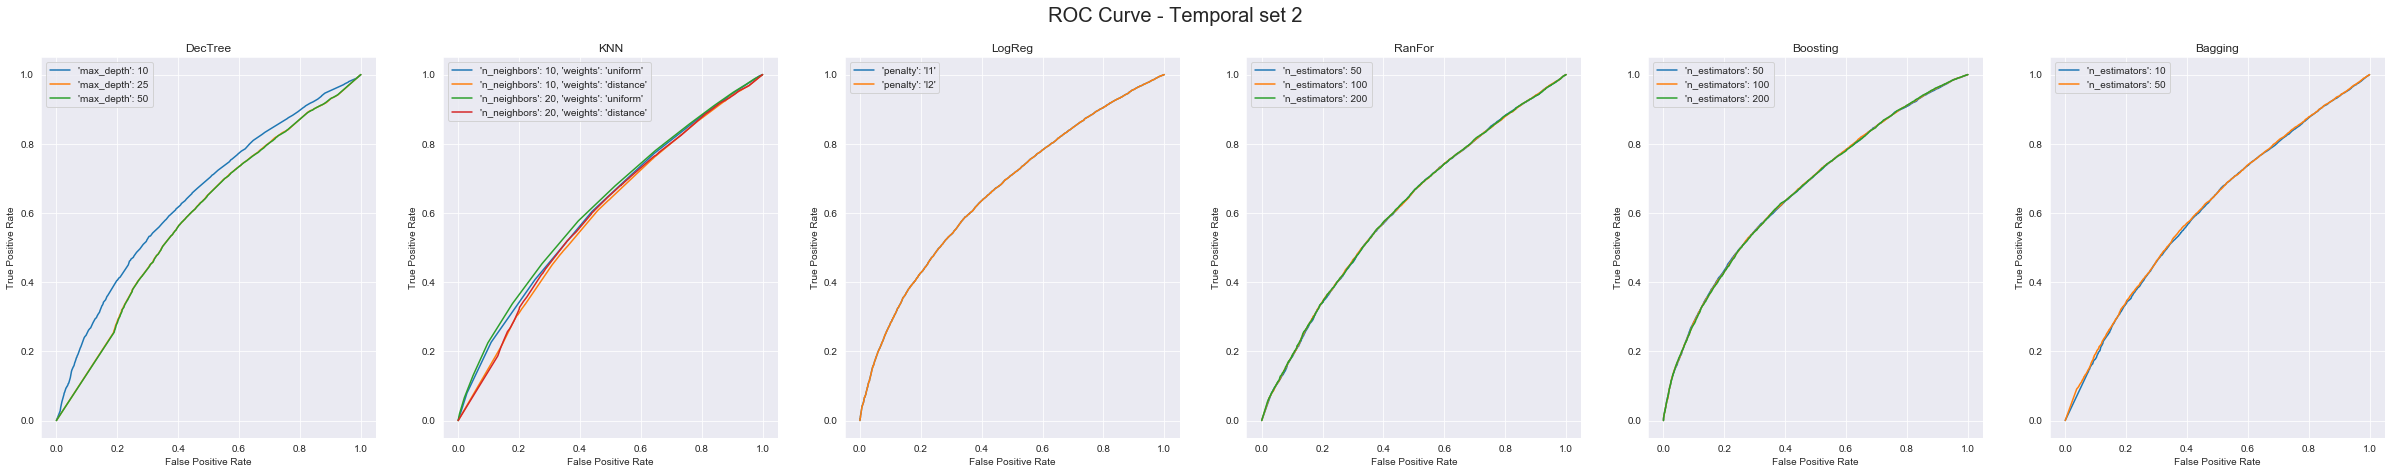

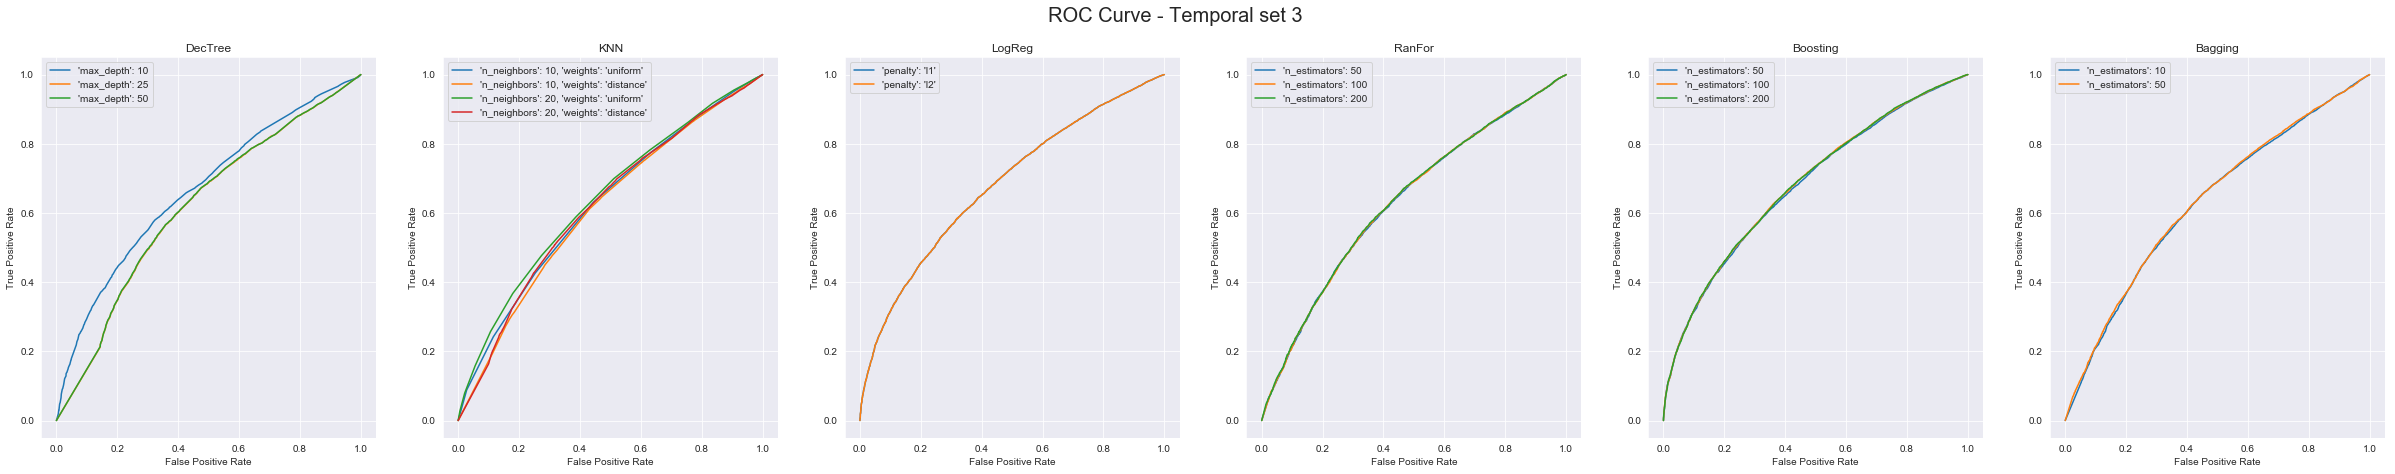

In [17]:
# Compare each classifier separately by temporal set
pp.compare_roc_curves_within_type(by_set_by_type)